In [156]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [157]:
red_wine = pd.read_csv('noisy_datasets/wine_quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('noisy_datasets/wine_quality/winequality-white.csv', sep=';')
red_wine['Wine Type'] = 'Red'
white_wine['Wine Type'] = 'White'
wine_quality = pd.concat([red_wine, white_wine], ignore_index=True)
print(wine_quality.describe())
wine_quality

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White


In [158]:
print("Missing values: ",wine_quality.isnull().sum())
print("As there are no missing values, we do not have to handle it.")

Missing values:  fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Wine Type               0
dtype: int64
As there are no missing values, we do not have to handle it.


In [159]:
print(wine_quality.info())
print("As Wine Type is the only object column which was also entered by us, we know the case will be constant.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Wine Type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None
As Wine Type is the only object column which was also ente

In [160]:
outlier_indices = []
for col in wine_quality.select_dtypes(include=['number']).columns:
    Q1 = wine_quality[col].quantile(0.25)
    Q3 = wine_quality[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = wine_quality[(wine_quality[col] < lower_bound) | (wine_quality[col] > upper_bound)]
    outlier_indices.extend(outliers.index)
    wine_quality[col] = wine_quality[col].where((wine_quality[col] >= lower_bound) & (wine_quality[col] <= upper_bound), wine_quality[col].median())
print(f"Outliers count: {len(set(outlier_indices))}")
print("Since the dataset will be reduced by more than 1600 values, we replace the outliers with the median.")


Outliers count: 1657
Since the dataset will be reduced by more than 1600 values, we replace the outliers with the median.


C:\Users\ruthv\AppData\Local\Temp\ipykernel_20868\4091564706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Wine Type', y='pH', data=wine_quality, palette='Set1')


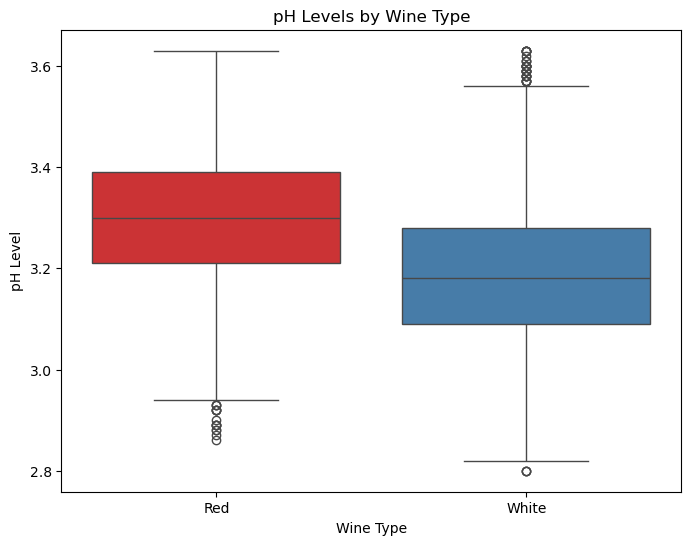

In [161]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Wine Type', y='pH', data=wine_quality, palette='Set1')
plt.title('pH Levels by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('pH Level')
plt.show()

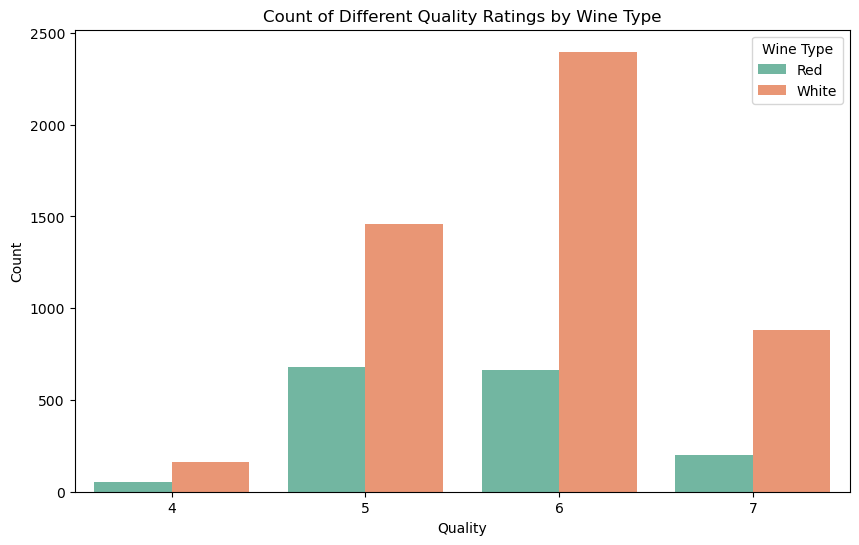

In [162]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', hue='Wine Type', data=wine_quality, palette='Set2')
plt.title('Count of Different Quality Ratings by Wine Type')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

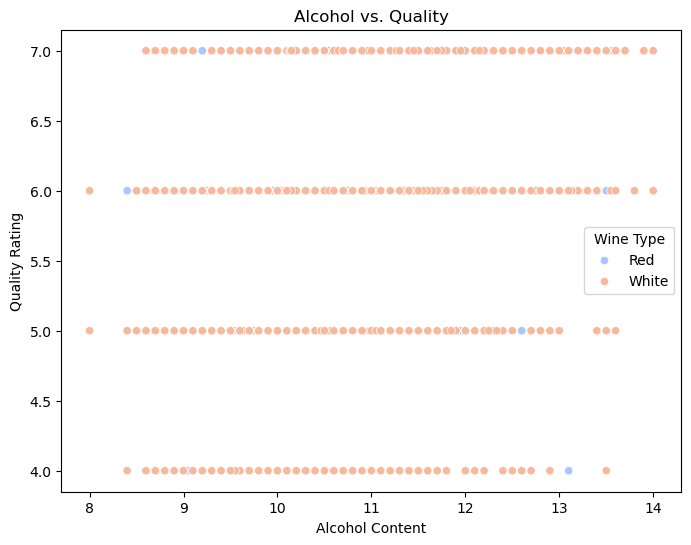

In [163]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='alcohol', y='quality', hue='Wine Type', data=wine_quality, palette='coolwarm')
plt.title('Alcohol vs. Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality Rating')
plt.show()

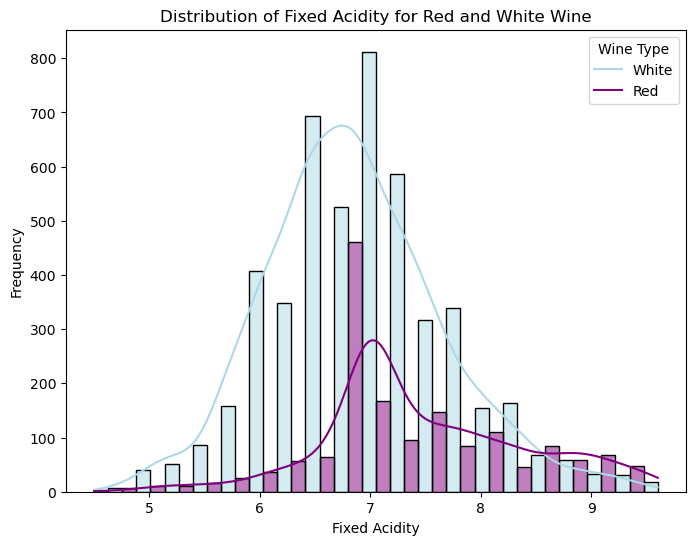

In [164]:
plt.figure(figsize=(8, 6))
sns.histplot(data=wine_quality, x='fixed acidity', hue='Wine Type', kde=True, bins=20, multiple='dodge', palette={'Red': 'purple', 'White': 'lightblue'})
plt.title('Distribution of Fixed Acidity for Red and White Wine')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.legend(title='Wine Type', labels=['White','Red'])
plt.show()

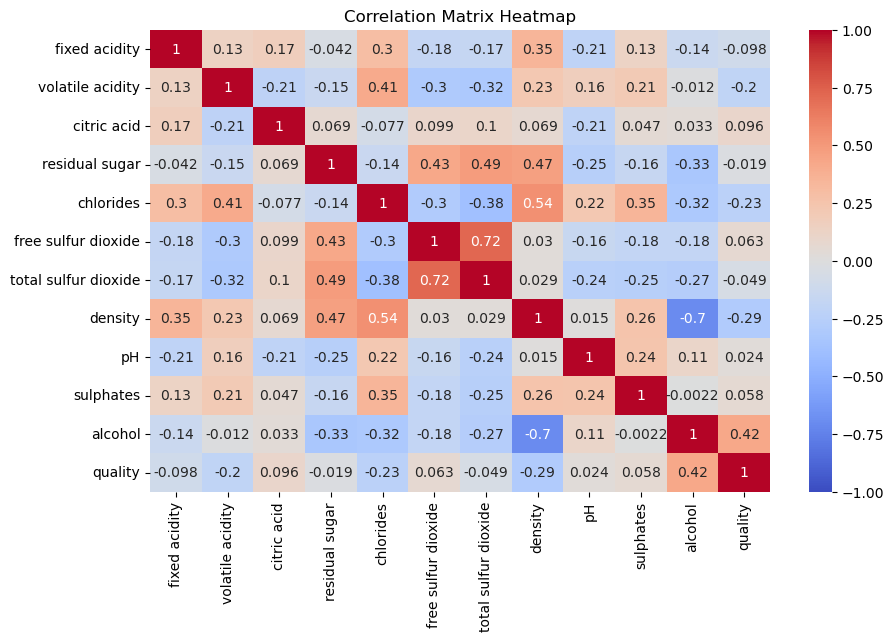

In [165]:
numeric_cols = wine_quality.select_dtypes(include='number').columns.tolist()
plt.figure(figsize=(10, 6))
corr_matrix = wine_quality[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [166]:
wine_quality = pd.get_dummies(wine_quality, columns=['Wine Type'], drop_first=False)

correlation_matrix = wine_quality.corr()
quality_corr = correlation_matrix['quality'].sort_values(ascending=False)
print("Correlations of features with Quality: ")
print(quality_corr)

threshold = 0.1
low_correlation_features = quality_corr[quality_corr.abs() < threshold].index.tolist()
print(f"Features with low correlation with Quality: {low_correlation_features}")
wine_quality = wine_quality.drop(columns=low_correlation_features)
wine_quality.head(5)

Correlations of features with Quality: 
quality                 1.000000
alcohol                 0.424999
Wine Type_White         0.104120
citric acid             0.095853
free sulfur dioxide     0.063031
sulphates               0.058413
pH                      0.024117
residual sugar         -0.019136
total sulfur dioxide   -0.048706
fixed acidity          -0.098150
Wine Type_Red          -0.104120
volatile acidity       -0.201473
chlorides              -0.229042
density                -0.292739
Name: quality, dtype: float64
Features with low correlation with Quality: ['citric acid', 'free sulfur dioxide', 'sulphates', 'pH', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']


,volatile acidity,chlorides,density,alcohol,quality,Wine Type_Red,Wine Type_White
0,0.29,0.076,0.9978,9.4,5,True,False
1,0.29,0.098,0.9968,9.8,5,True,False
2,0.29,0.092,0.9970,9.8,5,True,False
3,0.28,0.075,0.9980,9.8,6,True,False
4,0.29,0.076,0.9978,9.4,5,True,False


In [167]:
non_categorical_columns = wine_quality.select_dtypes(include=['number']).columns.tolist()
min_values = wine_quality[non_categorical_columns].min()
max_values = wine_quality[non_categorical_columns].max()
wine_quality[non_categorical_columns] = (wine_quality[non_categorical_columns] - min_values) / (max_values - min_values)


In [168]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   volatile acidity  6497 non-null   float64
 1   chlorides         6497 non-null   float64
 2   density           6497 non-null   float64
 3   alcohol           6497 non-null   float64
 4   quality           6497 non-null   float64
 5   Wine Type_Red     6497 non-null   bool   
 6   Wine Type_White   6497 non-null   bool   
dtypes: bool(2), float64(5)
memory usage: 266.6 KB
